In [2]:
# Importing the stock market data.

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# yfinance has been pre installed

WFC_DF = yf.download('WFC', start = '2018-4-29',end='2022-04-29')
WFC_ticker = yf.Ticker('WFC')

BAC_DF = yf.download('BAC', start = '2018-4-29',end='2022-04-29')
BAC_ticker = yf.Ticker('BAC')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
# Exporting the data to .csv and then importing it to ensure offline access.
# I swap between two different devices so I use Onedrive.
import yfinance as yf
import pandas as pd

# WFC_DF.to_csv('C:/Users/IanCH/OneDrive/WFC.csv', sep=str(','))
# BAC_DF.to_csv('C:/Users/IanCH/OneDrive/BAC.csv', sep=str(','))
WFC_DF = pd.read_csv('C:/Users/IanCH/OneDrive/WFC.csv',index_col='Date', parse_dates =[0])
BAC_DF = pd.read_csv('C:/Users/IanCH/OneDrive/BAC.csv',index_col='Date', parse_dates =[0])

In [3]:
# Calculating daily returns for the mean return.

def Daily_R(Open, Close):
    Daily_return = Open - Close/Open
    return round(Daily_return,5)

WFC_DF['Daily Return'] = WFC_DF[
    ['Open','Adj Close']].apply(
    lambda df: Daily_R(
        df['Open'],df['Adj Close']), axis=1)

BAC_DF['Daily Return'] = BAC_DF[
    ['Open','Adj Close']].apply(
    lambda df: Daily_R(
        df['Open'],df['Adj Close']), axis=1)

# Same as: 
# WFC_DF['Daily Return'] = (['Adj Close'] - ['Open']/['Open'])
# BAC_DF['Daily Return'] = (['Adj Close'] - ['Open']/['Open']) 

# Other method:
# WFC_DF['Daily Return'] = np.vectorize(Daily_R)(df['Open'],df['Adj Close'])
# BAC_DF['Daily Return'] = np.vectorize(Daily_R)(df['Open'],df['Adj Close'])

# apply() applies the function across the selected dataframe columns.
# lambda is a small one time function, it is required to specifiy multiple columns.
# np.vectorize is a covenance function that replaces apply() included with numpy.

In [4]:
# Showing the dataframes

print(WFC_DF.head())
print(BAC_DF.head())

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2018-04-30  52.560001  53.049999  51.959999  51.959999  44.958462  17050500   
2018-05-01  51.759998  52.599998  51.599998  52.560001  45.477615  13903800   
2018-05-02  52.380001  52.869999  52.060001  52.189999  45.157471  16397200   
2018-05-03  51.619999  51.790001  50.810001  51.540001  44.930809  19216100   
2018-05-04  51.169998  52.900002  51.070000  52.410000  45.689243  16660500   

            Daily Return  
Date                      
2018-04-30      51.70463  
2018-05-01      50.88137  
2018-05-02      51.51789  
2018-05-03      50.74958  
2018-05-04      50.27711  
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2018-04-30  30.270000  30.430000  29.920000  29.920000  26.750225   55153900   
2018-05-01  29.92

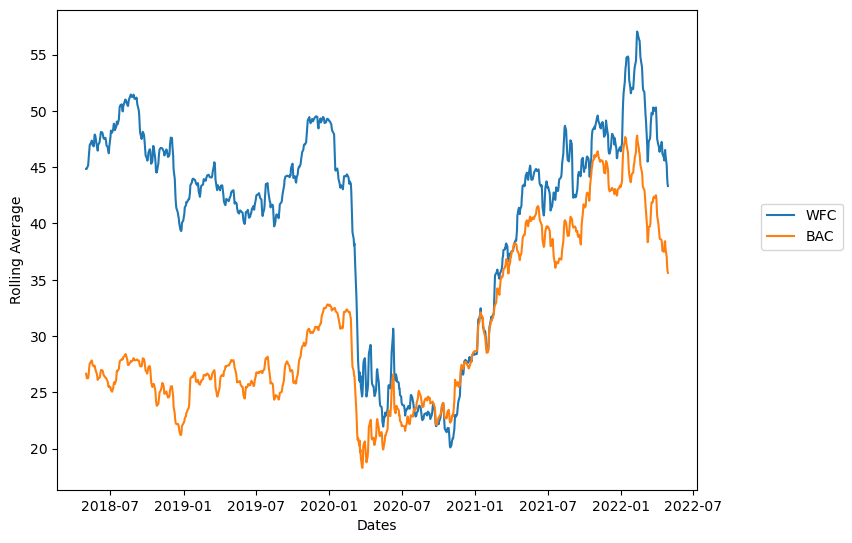

In [9]:
# Calculating the rolling mean for three days.

x1 = WFC_DF['Adj Close'].rolling(window=3).mean()
x2 = BAC_DF['Adj Close'].rolling(window=3).mean()

fig = plt.figure()

ax = fig.add_axes([0,0,1,1],xlabel = 'Dates', ylabel = 'Rolling Average')

ax.plot(x1,label='WFC')

ax.plot(x2, label = 'BAC') # Creates a second line

ax.legend(loc='lower left') # moving the legend around.

ax.legend(loc=(1.1,0.5)) # puts the legend on the far right outside of the plot.

plt.xticks(ha='center'); # alings all the tickers to a center postition

# Every three days this sums the Adj Close column values and divides by 3.
# Then it moves down by one day and does it again.
# No data for the first two days.

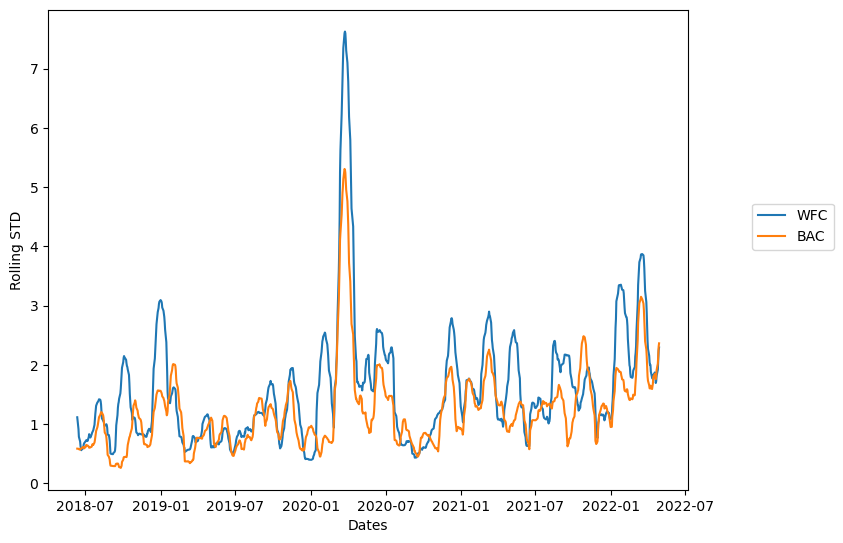

In [21]:
# Calculating Rolling Standard Deviiation to show volatility.

x1 = WFC_DF['Adj Close'].rolling(30).std()
x2 = BAC_DF['Adj Close'].rolling(30).std()

fig = plt.figure()

ax = fig.add_axes([0,0,1,1], xlabel = 'Dates', ylabel = 'Rolling STD')

ax.plot(x1,label='WFC')

ax.plot(x2, label = 'BAC') # Creates a second line

ax.legend(loc='lower left') # moving the legend around.

ax.legend(loc=(1.1,0.5)) # puts the legend on the far right outside of the plot.

plt.xticks(ha='center');

# std is short for standard deviation
# std is the square root of the sum of (each value - mean)/ number of examples - 1.
# the division does not take place until the summing is complete.

Ratio rating for all risk ratios below:

* 0-1 Bad
* 1-2 Good
* 2-3 Very good
* '>= 3' Excellent

In [ ]:
# Daily & Annual Sharpie Ratio

def annual_sharpe_ratio(df,risk_free=0)
    mean_return = df['Daily Return'].mean()
    standard_deviation = df['Daily Return'].std()
    sharpe_ratio = (mean_return-risk_free)/standard_deviation
    return sharpe_ratio * (252**0.5) 

def daily_sharpe_ratio(df,risk_free=0)
    mean_return = df['Daily Return'].mean()
    standard_deviation = df['Daily Return'].std()
    sharpe_ratio = (mean_return-risk_free)/standard_deviation
    return sharpe_ratio

# risk free is assumed to be zero
# Sharpe ratio is a measure of risk and return usally on an annual basies so multiplied by 252**0.5 or np.sqrt(252).
# np.sqrt(252) assumes you have imported numpy, sqrt is short for square root.
# Higher standard deviation (volatility) decreases the sharpe ratio.

In [3]:
# Annual Sortino Ratio

def annual_sortino_ratio(df,threshold=0,risk_free_rate=0):
    mean_return = df['Daily Return'].mean() 
    negative_standard_deviation = downside.std()
    downside = df[df['Daily Return']<threshold]['Daily Return'] # Filtering for negative returns.
    sortino_ratio = (mean_return-risk_free_rate)/negative_standard_deviation
    return sortino_ratio * (252**0.5)

# just print this
PSR_BAC = probabilistic_sharpe_ratio(BAC_DF)
PSR_BAC = probabilistic_sharpe_ratio(BAC_DF)

# We only take into account the daily and yearly returns below a certain threshold. 
# THe difference here is that we are only looking at the standard deviation (volatility), where returns are negative.

PEMDAS:
* parentheses
* exponents
* multiplication
* Addition
* Subraction
* Important for below

Normal Distribution:

* Symmetrical on both sides of the curve.
* Displays three standard deviation from the center (mean) on both sides.
* Commonly used in hypothesis testing to determine if based on alpha the null hypothesis should be rejected.
* Goes until infinity.

<img src="https://kanbanize.com/blog/wp-content/uploads/2014/07/Standard_deviation_diagram.png" alt="image info" width = 500px height = 500px />

In [ ]:
# Probabilistic Sharpe Ratio

import scipy.stats

def probabilistic_sharpe_ratio(df,benchmark=0):
    sharpe_ratio = daily_sharpe_ratio(df) # function showin above 
    skew = scipy.stats.skew(df['Daily Return'])
    kurtosis = scipy.stats.kurtosis(df['Daily Return']), fisher=True)
    n = len(df)
    sigma_sr = ( (1/(n-1))  (1 + 0.5*sr**2 + skew*sr+(kurtosis/4 )*sharpe_ratio**2 )
    ratio = (sharpe_ratio-benchmark)/sigma sr)
    probabilistic_sharpe_ratio = scipy.stats.norm.cdf(ratio)
    return probabilistic_sharpe_ratio

PSR_WFC = probabilistic_sharpe_ratio(WFC_DF)
Annual_PSR_WFC = PSR_WFC * (252**0.5)

PSR_BAC = probabilistic_sharpe_ratio(BAC_DF)
Annual_PSR_BAC = PSR_BACK * (252**0.5)

# In this example we are comparing the benchmark psr of 0 to the calculated psr. What is the likelyhood of the benchmark.
# The probabilistic Sharpe Ratio (PSR) takes into account the skew and kurtosis of returns to a Sharpe Ratio.
# This formula follows the normal distribution showin above.
# In other words probability in addition to volatility.
# full explanation with formula: https://quantdare.com/probabilistic-sharpe-ratio/ # third formula on the page. 